### EDA Project on Unicorn Companies Data
### Introduction to Unicorn Companies Exploratory Data Analysis

In the rapidly evolving landscape of the global economy, the emergence of "unicorn" companies has become a noteworthy phenomenon. Unicorn companies are those innovative startups that have achieved a valuation of at least $1 billion. Tracking their growth, understanding their industries, and uncovering patterns in their development are essential tasks for investors, policymakers, and analysts alike.

This Exploratory Data Analysis (EDA) project delves into the world of unicorn companies, aiming to gain valuable insights from a comprehensive dataset. Our dataset encompasses a diverse range of information about these unicorns, allowing us to analyze and visualize their journey towards billion-dollar valuations.

#### Data Dictionary

Before embarking on our EDA journey, let's familiarize ourselves with the key attributes in our dataset:

- **Company**: The name of the unicorn company.
- **Valuation**: The company's valuation in billions (B) of dollars, representing its market worth.
- **Date Joined**: The date on which the company reached the coveted $1 billion valuation milestone.
- **Industry**: The industry to which the company belongs, providing insights into the sectors that breed unicorns.
- **City**: The city where the company was founded, shedding light on geographical trends in unicorn creation.
- **Country**: The country in which the company originated, giving us a broader view of the unicorn landscape on a national scale.
- **Continent**: The continent where the company was founded, helping us understand global unicorn distribution.
- **Year Founded**: The year when the company was initially established, providing historical context.
- **Funding**: The total amount raised across all funding rounds, measured in billions (B) or millions (M) of dollars, showcasing the financial backing behind these unicorns.
- **Select Investors**: The top four investing firms or individual investors associated with the company, highlighting key players in the unicorn ecosystem.

##### Objective

Through this EDA project, our primary objective is to extract meaningful insights from the unicorn companies dataset. We aim to answer questions such as:

- What are the prevailing industries among unicorn companies?
- How have unicorn valuations evolved over the years?
- Which cities and countries are hotbeds for unicorn creation?
- Are there any patterns or correlations between funding and valuation?
- Who are the prominent investors backing these unicorns?

By applying data analysis and visualization techniques to this rich dataset, we aspire to uncover trends, patterns, and hidden gems within the world of unicorn companies. These insights can inform investment decisions, guide startup strategies, and contribute to a deeper understanding of the entrepreneurial landscape on a global scale.

Join us on this data-driven journey as we explore the enchanting realm of unicorn companies and unveil the secrets behind their billion-dollar success stories.


In [1]:
# import packages 
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Load dataset and display 5 rows 
df_companies = pd.read_csv('Unicorn_Companies.csv')
df_companies.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
# Display the data types of the columns.
df_companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [4]:
# covert Date Joined columns from object type to datime type
df_companies['Date Joined'] = pd.to_datetime(df_companies['Date Joined'])

In [5]:
#create a new column "Years To unicorn". the number of years between when a company was found and when it became a unicorn
df_companies['Years To Unicorn'] = df_companies['Date Joined'].dt.year - df_companies['Year Founded']

In [6]:
#Get descriptive statistics for the data
df_companies.describe()

,Date Joined,Year Founded,Years To Unicorn
count,1074,1074.000000,1074.000000
mean,2020-05-19 15:35:51.955307264,2012.895717,7.000931
min,2007-07-02 00:00:00,1919.000000,-4.000000
25%,2019-05-20 06:00:00,2011.000000,4.000000
50%,2021-03-29 00:00:00,2014.000000,6.000000
75%,2021-09-19 18:00:00,2016.000000,9.000000
max,2022-04-05 00:00:00,2021.000000,98.000000
std,NaN,5.698573,5.329672


In [7]:
#isolating the negative value in 'Years to Unicorn'
df_companies[df_companies['Years To Unicorn'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",-4


In [8]:
#searched the internet & found that Yidian Zixun was founded in 2013
df_companies.loc[df_companies['Company']=='Yidian Zixun', 'Year Founded'] = 2013
df_companies[df_companies['Company']=='Yidian Zixun'] 

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",-4


In [9]:
#recalute the years to unicorn column
df_companies['Years To Unicorn'] = df_companies['Date Joined'].dt.year - df_companies['Year Founded']
df_companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.008380
std         5.319864
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [10]:
# checking all companies with 0 years to unicorn
df_companies[df_companies['Years To Unicorn'] == 0]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
161,Ola Electric Mobility,$5B,2019-07-02,Auto & transportation,Bengaluru,India,Asia,2019,$761M,"SoftBank Group, Tiger Global Management, Matri...",0
314,Flink Food,$3B,2021-12-01,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures",0
396,candy.com,$2B,2021-10-21,Fintech,New York,United States,North America,2021,$100M,"Insight Partners, Softbank Group, Connect Vent...",0
546,Avant,$2B,2012-12-17,Artificial intelligence,Chicago,United States,North America,2012,$658M,"RRE Ventures, Tiger Global, August Capital",0
554,ClickHouse,$2B,2021-10-28,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par...",0
775,Jokr,$1B,2021-12-02,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft",0
822,GlobalBees,$1B,2021-12-28,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",0
967,Mensa Brands,$1B,2021-11-16,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa...",0
1001,Playco,$1B,2020-09-21,Other,Tokyo,Japan,Asia,2020,$140M,"Sozo Ventures, Caffeinated Capital, Sequoia Ca...",0


In [11]:
# correct the year founded for companies 
df_companies.loc[df_companies['Company']=='Ola Electric Mobility', 'Year Founded'] = 2017
df_companies.loc[df_companies['Company']=='candy.com', 'Year Founded'] = 2009
df_companies.loc[df_companies['Company']=='Avant', 'Year Founded'] = 2012
df_companies.loc[df_companies['Company']=='ClickHouse', 'Year Founded'] = 2012
df_companies.loc[df_companies['Company']=='Jokr', 'Year Founded'] = 2007
df_companies.loc[df_companies['Company']=='Mensa Brands', 'Year Founded'] = 1946

#recalute the years to unicorn column
df_companies['Years To Unicorn'] = df_companies['Date Joined'].dt.year - df_companies['Year Founded']
df_companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.112663
std         5.697841
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [12]:
#count the companies founded by year
df_companies["Year Founded"].value_counts().sort_values(ascending=False)

Year Founded
2015    155
2016    110
2014    109
2012     96
2013     88
2011     82
2017     75
2018     61
2019     44
2010     40
2009     35
2008     27
2020     25
2007     25
2006     15
2005     14
2000     11
2001      9
1999      8
2003      8
2004      8
2021      6
1998      5
2002      4
1994      2
1995      2
1984      1
1993      1
1946      1
1990      1
1919      1
1992      1
1979      1
1996      1
1991      1
1997      1
Name: count, dtype: int64

In [13]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

#check which values are are in `Industry` but not in `industry_list`
set(df_companies['Industry']) - set(industry_list)

{'Artificial Intelligence'}

In [14]:
#replace with incorrect value in industry column 
replacement_dict = {'Artificial Intelligence': 'Artificial intelligence'}

df_companies['Industry'] = df_companies['Industry'].replace(replacement_dict)
#checking if the correction is accurate
set(df_companies['Industry']) - set(industry_list)

set()

In [14]:
#check the for duplicate companies 
df_companies[df_companies.duplicated(subset=["Company"], keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments",5
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic",7


In [15]:
#drop duplicates 
df_companies = df_companies.drop_duplicates(subset=['Company'], keep='first')

**So far have I:** 
- loaded the data
- added a new column 'years to unicorn' 
- examined the dataset with descriptive statisitics 
- cleaned out incorrect info in the 'year founded' column 
- corrected spelling errors in the industry column 

Next steps will be to carry out the objectives of this EDA
- What are the prevailing industries among unicorn companies?
- How have unicorn valuations evolved over the years?
- Which cities and countries are hotbeds for unicorn creation?
- Are there any patterns or correlations between funding and valuation?
- Who are the prominent investors backing these unicorns?



In [16]:
#industries with the most unicrons 
df_companies["Industry"].value_counts().sort_values(ascending=False)

Industry
Fintech                                223
Internet software & services           205
E-commerce & direct-to-consumer        111
Artificial intelligence                 84
Health                                  74
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: count, dtype: int64

In [17]:
#transforming the data for a bar chart
agg_df = df_companies.groupby(['Industry'])['Company'].count().reset_index()
agg_df.columns = agg_df.columns.str.replace('Company', 'Count')
agg_df.head()

,Industry,Count
0,Artificial intelligence,84
1,Auto & transportation,31
2,Consumer & retail,25
3,Cybersecurity,50
4,Data management & analytics,41


In [18]:
#bar chart 
fig = px.bar(agg_df, x='Industry', y='Count')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [19]:
#treemap 
fig3 = px.treemap(df_companies, path=['Industry', 'Company'],
                  color='Industry')
fig.update_layout(title= 'Distrubtion of unicorns by industry')
fig3.show()

So far we can tell that Fintech was the leading industry with a total of 223 unicorns. Followed By Internet and &software, E-commerce and Artifical intelligence. 

In [20]:
#countries witht the highest number of unicorns 
df_companies["Country"].value_counts().sort_values(ascending=False)

Country
United States           561
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Netherlands               6
Sweden                    6
Mexico                    6
Indonesia                 6
Hong Kong                 6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
Spain                     3
Belgium                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Chile                     2
Bahamas     

In [21]:
#get the data ready for a bar chart 
countries_df = df_companies.groupby(['Country'])['Company'].count().reset_index()
countries_df.columns = countries_df.columns.str.replace('Company', 'Count')
mask_df = countries_df['Count'] > 20
#bar chart 
fig = px.bar(countries_df[mask_df], x='Country', y='Count')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [22]:
#treemap
fig3 = px.treemap(df_companies, path=['Country','Industry', 'Company'],
                  color='Country')
fig3.show()

We can see now that the top 5 countries with the highest number of unicorns are USA, China, UK, Germany and France. 

In [23]:
def convert_and_replace(string):
    if '$' in string and 'M' in string:
        value = float(string.replace('$', '').replace('M', '')) * 10000
    elif '$' in string and 'B' in string:
        value = float(string.replace('$', '').replace('B', '')) * 100000000
    else:
        value = None
    return value if value is not None else None

df_companies['Funding_num'] = df_companies['Funding'].apply(convert_and_replace)
df_companies['Valuation_num'] = df_companies['Valuation'].apply(convert_and_replace)
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,Funding_num,Valuation_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,800000000.0,1.800000e+10
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,700000000.0,1.000000e+10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,200000000.0,1.000000e+10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,200000000.0,9.500000e+09
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,400000000.0,4.600000e+09


In [24]:
#check the correlation between funding and valutaion
correlation = df_companies['Funding_num'].corr(df_companies['Valuation_num'])
print(f"Correlation between Funding and Valuation: {correlation}")


Correlation between Funding and Valuation: 0.5893300225785757


In [25]:
fig2 = px.scatter(df_companies,x=df_companies['Funding_num'], y=df_companies['Valuation_num'], color=df_companies['Industry'])
fig2.show()

Since the result of the correlation is close to zero it indicates little to no linear correlation between funding and valution. However there is no negative correlation between funding and valution

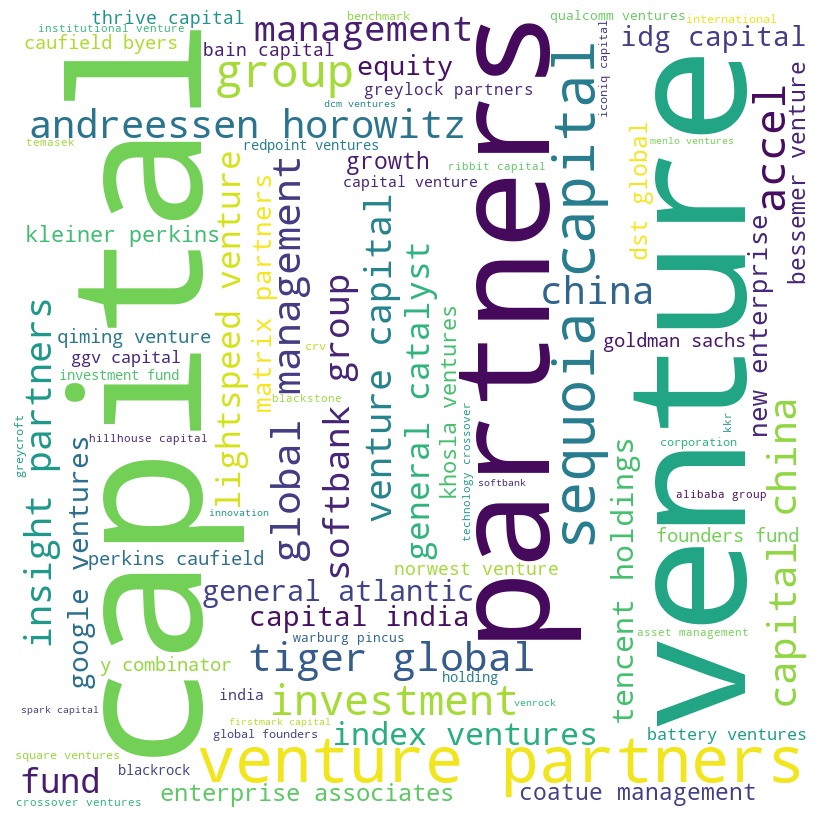

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Python program to generate WordCloud

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_companies['Select Investors']:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
